In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_Acc.npy")[:, :, 2]
    return x

In [ ]:
Hips = load_numpy("Hips")

np.where(np.isnan(Hips))

In [ ]:
Bag = load_numpy("Bag")
HIps = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
test = np.load("../Data/センサ別npyファイル/test/test_Glo_Acc.npy")[:, :, 2]

In [ ]:
def get_skew(x):
    x_kurtosis = stats.kurtosis(x, axis=1)
    x_skew = stats.skew(x, axis=1)
    result = np.concatenate([x_kurtosis.reshape([-1, 1]), x_skew.reshape([-1, 1])], axis=1)
    del x_kurtosis, x_skew
    return result

In [ ]:
test_skew = get_skew(test)
test.shape

In [ ]:
np.save("../Output/test/test_glo_accel_z_skew_kurtosis", test)

In [ ]:
Bag_skew = get_skew(Bag)
Hips_skew = get_skew(HIps)
Torso_skew = get_skew(Torso)
Hand_skew = get_skew(Hand)

Bag_skew.shape

In [ ]:
np.save("train_Bag_glo_accel_z_skew_kurtosis", Bag_skew)
np.save("train_Hips_glo_accel_z_skew_kurtosis", Hips_skew)
np.save("train_Torso_glo_accel_z_skew_kurtosis", Torso_skew)
np.save("train_Hand_glo_accel_z_skew_kurtosis", Hand_skew)

In [ ]:
def fft(x):
    for i in range(x.shape[0]):
        x[i] = x[i] - np.mean(x[i])
    x = np.abs(np.fft.fft(x, axis=1))
    max_amplitude = np.amax(x, axis=1)
    max_index = np.argmax(x, axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [ ]:
test_FFT = fft(test)
test_FFT.shape

In [ ]:
np.save("../Output/test/test_glo_accel_z_amplitude_frequency", test_FFT)

In [ ]:
Bag_FFT = fft(Bag)

Bag_FFT

In [ ]:
Bag_FFT[:, 1] != 0

In [ ]:
Bag_FFT.shape

In [ ]:
plt.plot(Bag_FFT[0:250, 1])
plt.xlim(0, 250)
# plt.ylim(0, 100)

In [ ]:
Hips_FFT = fft(HIps)
Torso_FFT = fft(Torso)
Hand_FFT = fft(Hand)

Hand_FFT.shape

In [ ]:
np.save("train_Bag_glo_accel_z_amplitude_frequency", Bag_FFT)
np.save("train_Hips_glo_accel_z_amplitude_frequency", Hips_FFT)
np.save("train_Torso_glo_accel_z_amplitude_frequency", Torso_FFT)
np.save("train_Hand_glo_accel_z_amplitude_frequency", Hand_FFT)

In [ ]:
%reset

# ここからvalidationデータの前処理

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
Bag = pickle.load(open("validation_Bag.binaryfile", 'rb'))
Hips = pickle.load(open("validation_Hips.binaryfile", 'rb'))
Torso = pickle.load(open("validation_Torso.binaryfile", 'rb'))
Hand = pickle.load(open("validation_Hand.binaryfile", 'rb'))

Bag.shape

In [ ]:
def get_skew(x):
    x_kurtosis = stats.kurtosis(x[:, :, 6], axis=1)
    x_skew = stats.skew(x[:, :, 6], axis=1)
    result = np.concatenate([x_kurtosis.reshape([-1, 1]), x_skew.reshape([-1, 1])], axis=1)
    del x_kurtosis, x_skew
    return result

In [ ]:
Bag_skew = get_skew(Bag)
Hips_skew = get_skew(Hips)
Torso_skew = get_skew(Torso)
Hand_skew = get_skew(Hand)

Bag_skew.shape

In [ ]:
np.save("validation_Bag_glo_accel_z_skew_kurtosis", Bag_skew)
np.save("validation_Hips_glo_accel_z_skew_kurtosis", Hips_skew)
np.save("validation_Torso_glo_accel_z_skew_kurtosis", Torso_skew)
np.save("validation_Hand_glo_accel_z_skew_kurtosis", Hand_skew)

In [ ]:
def fft(x):
    for i in range(x.shape[0]):
        x[i, :, 6] = x[i, :, 6] - np.mean(x[i, :, 6], axis=0)
    x[:, :, 6] = np.abs(np.fft.fft(x[:, :, 6], axis=1))
    max_amplitude = np.amax(x[:, :, 6], axis=1)
    max_index = np.argmax(x[:, :, 6], axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [ ]:
Bag_FFT = fft(Bag)
Hips_FFT = fft(Hips)
Torso_FFT = fft(Torso)
Hand_FFT = fft(Hand)

Hand_FFT.shape

In [ ]:
np.save("validation_Bag_glo_accel_z_amplitude_frequency", Bag_FFT)
np.save("validation_Hips_glo_accel_z_amplitude_frequency", Hips_FFT)
np.save("validation_Torso_glo_accel_z_amplitude_frequency", Torso_FFT)
np.save("validation_Hand_glo_accel_z_amplitude_frequency", Hand_FFT)

In [ ]:
def val_Preprocess(x):
    x_xy = np.sqrt(np.square(x[:, :, 4].copy()) + np.square(x[:, :, 5].copy()))
    x_xy_mean = np.mean(x_xy.copy(), axis=1)
    x_xy_var = np.var(x_xy.copy(), axis=1)
    x_z_mean = np.mean(x[:, :, 6].copy(), axis=1)
    x_z_var = np.var(x[:, :, 6].copy(), axis=1)
    x_pressure_change = x[:, -1, -1] - x[:, 0, -1]
    result = np.vstack([x_xy_mean, x_xy_var, x_z_mean, x_z_var, x_pressure_change]).T
    return result

In [ ]:
test = pickle.load(open("../Output/test/test.binaryfile", 'rb'))
test.shape

In [ ]:
test_preprocess = val_Preprocess(test)
test_preprocess.shape

In [ ]:
np.save("../Output/test/test_glo_accel_xy_mean", test_preprocess[:, 0])
np.save("../Output/test/test_glo_accel_xy_var", test_preprocess[:, 1])
np.save("../Output/test/test_glo_accel_z_mean", test_preprocess[:, 2])
np.save("../Output/test/test_glo_accel_z_var", test_preprocess[:, 3])
np.save("../Output/test/test_pressure_change", test_preprocess[:, 4])

In [ ]:
Bag_preprocess = val_Preprocess(Bag)
Hips_preprocess = val_Preprocess(Hips)
Torso_preprocess = val_Preprocess(Torso)
Hand_preprocess = val_Preprocess(Hand)

Bag_preprocess.shape

In [ ]:
def save_npy(x, hold_position):
    np.save("validation_" + hold_position + "_glo_accel_xy_mean", x[:, 0])
    np.save("validation_" + hold_position + "_glo_accel_xy_var", x[:, 1])
    np.save("validation_" + hold_position + "_glo_accel_z_mean", x[:, 2])
    np.save("validation_" + hold_position + "_glo_accel_z_var", x[:, 3])
    np.save("validation_" + hold_position + "pressure_change", x[:, 4])

In [ ]:
save_npy(Bag_preprocess, "Bag")
save_npy(Hips_preprocess, "Hips")
save_npy(Torso_preprocess, "Torso")
save_npy(Hand_preprocess, "Hand")

## trainデータのGlo_LAccの変形

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_LAcc.npy")
    return x

In [ ]:
Bag = load_numpy("Bag")
HIps = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
def lacc_convert(x):
    x_xy = np.sqrt(np.square(x[:, :, 0]) + np.square(x[:, :, 1]))
    x_xy_mean = np.mean(x_xy, axis=1)
    x_xy_var = np.var(x_xy, axis=1)
    x_z_mean = np.mean(x[:, :, 2], axis=1)
    x_z_abs_mean = np.mean(np.abs(x[:, :, 2]), axis=1)
    x_z_var = np.var(x[:, :, 2], axis=1)
    x_z_kurtosis = stats.kurtosis(x[:, :, 2], axis=1)
    x_z_skew = stats.skew(x[:, :, 2], axis=1)
    result = np.concatenate([x_xy_mean.reshape(-1, 1), x_xy_var.reshape([-1, 1]), x_z_mean.reshape([-1, 1]), x_z_abs_mean.reshape([-1, 1]), x_z_var.reshape([-1, 1]), x_z_skew.reshape([-1, 1]), x_z_kurtosis.reshape([-1, 1])], axis=1)
    del x_xy, x_xy_mean, x_xy_var, x_z_mean, x_z_abs_mean, x_z_var
    return result

In [ ]:
Bag_lacc = lacc_convert(Bag)
Hips_lacc = lacc_convert(HIps)
Torso_lacc = lacc_convert(Torso)
Hand_lacc = lacc_convert(Hand)

Hand_lacc.shape

In [ ]:
def save_npy(x, hold_position):
    np.save("train_" + hold_position + "_glo_laccel_xy_mean", x[:, 0])
    np.save("train_" + hold_position + "_glo_laccel_xy_var", x[:, 1])
    np.save("train_" + hold_position + "_glo_laccel_z_mean", x[:, 2])
    np.save("train_" + hold_position + "_glo_laccel_z_abs_mean", x[:, 3])
    np.save("train_" + hold_position + "_glo_laccel_z_var", x[:, 4])
    np.save("train_" + hold_position + "_glo_laccel_z_skew", x[:, 5])
    np.save("train_" + hold_position + "_glo_laccel_z_kurtosis", x[:, 6])

In [ ]:
save_npy(Bag_lacc, "Bag")
save_npy(Hips_lacc, "Hips")
save_npy(Torso_lacc, "Torso")
save_npy(Hand_lacc, "Hand")

In [ ]:
def fft(x):
    for i in range(x.shape[0]):
        x[i] = x[i] - np.mean(x[i])
    x = np.abs(np.fft.fft(x, axis=1))
    max_amplitude = np.amax(x, axis=1)
    max_index = np.argmax(x, axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(HIps[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
np.save("train_Bag_glo_laccel_z_amplitude_frequency", Bag_FFT)
np.save("train_Hips_glo_laccel_z_amplitude_frequency", Hips_FFT)
np.save("train_Torso_glo_laccel_z_amplitude_frequency", Torso_FFT)
np.save("train_Hand_glo_laccel_z_amplitude_frequency", Hand_FFT)

# Validationもセンサ別にnpyにしておくよ

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
Bag = pickle.load(open("validation_Bag.binaryfile", 'rb'))
Hips = pickle.load(open("validation_Hips.binaryfile", 'rb'))
Torso = pickle.load(open("validation_Torso.binaryfile", 'rb'))
Hand = pickle.load(open("validation_Hand.binaryfile", 'rb'))

In [ ]:
import os
def save_npy(x, hold_position):
    path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/"
    if not os.path.exists(path):
        os.makedirs(path)
    np.save(path + "validation_" + hold_position + "_Label", x[:, :, 0])
    np.save(path + "validation_" + hold_position + "_Acc", x[:, :, 1:4])
    np.save(path + "validation_" + hold_position + "_Glo_Acc", x[:, :, 4:7])
    np.save(path + "validation_" + hold_position + "_Gra", x[:, :, 7:10])
    np.save(path + "validation_" + hold_position + "_Gyr", x[:, :, 10:13])
    np.save(path + "validation_" + hold_position + "_LAcc", x[:, :, 13:16])
    np.save(path + "validation_" + hold_position + "_Mag", x[:, :, 16:19])
    np.save(path + "validation_" + hold_position + "_Ori", x[:, :, 19:23])
    np.save(path + "validation_" + hold_position + "_Pressure", x[:, :, 23])

In [ ]:
save_npy(Bag, "Bag")
save_npy(Hips, "Hips")
save_npy(Torso, "Torso")
save_npy(Hand, "Hand")

# 続けてtestデータも

In [ ]:
test = pickle.load(open("test.binaryfile", 'rb'))
test.shape

In [ ]:
import os
def save_npy(x):
    path = "../Data/センサ別npyファイル/test/"
    if not os.path.exists(path):
        os.makedirs(path)
    np.save(path + "test_Acc", x[:, :, 0:3])
    np.save(path + "test_Glo_Acc", x[:, :, 3:6])
    np.save(path + "test_Gra", x[:, :, 6:9])
    np.save(path + "test_Gyr", x[:, :, 9:12])
    np.save(path + "test_LAcc", x[:, :, 12:15])
    np.save(path + "test_Mag", x[:, :, 15:18])
    np.save(path + "test_Ori", x[:, :, 18:22])
    np.save(path + "test_Pressure", x[:, :, 22])

In [ ]:
save_npy(test)

# Validationデータの世界座標系線形加速度の変換

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_Lacc.npy")
    return x

In [ ]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

In [ ]:
def load_numpy():
    x = np.load("../Data/センサ別npyファイル/test/test_Glo_Lacc.npy")
    return x

In [ ]:
test = load_numpy()
test.shape

In [ ]:
def lacc_convert(x):
    x_xy = np.sqrt(np.square(x[:, :, 0]) + np.square(x[:, :, 1]))
    x_xy_mean = np.mean(x_xy, axis=1)
    x_xy_var = np.var(x_xy, axis=1)
    x_z_mean = np.mean(x[:, :, 2], axis=1)
    x_z_abs_mean = np.mean(np.abs(x[:, :, 2]), axis=1)
    x_z_var = np.var(x[:, :, 2], axis=1)
    x_z_kurtosis = stats.kurtosis(x[:, :, 2], axis=1)
    x_z_skew = stats.skew(x[:, :, 2], axis=1)
    result = np.concatenate([x_xy_mean.reshape(-1, 1), x_xy_var.reshape([-1, 1]), x_z_mean.reshape([-1, 1]), x_z_abs_mean.reshape([-1, 1]), x_z_var.reshape([-1, 1]), x_z_skew.reshape([-1, 1]), x_z_kurtosis.reshape([-1, 1])], axis=1)
    del x_xy, x_xy_mean, x_xy_var, x_z_mean, x_z_abs_mean, x_z_var
    return result

In [ ]:
test_lacc = lacc_convert(test)
test_lacc.shape

In [ ]:
def save_npy(x):
    np.save("../Output/test/test_glo_laccel_xy_mean", x[:, 0])
    np.save("../Output/test/test_glo_laccel_xy_var", x[:, 1])
    np.save("../Output/test/test_glo_laccel_z_mean", x[:, 2])
    np.save("../Output/test/test_glo_laccel_z_abs_mean", x[:, 3])
    np.save("../Output/test/test_glo_laccel_z_var", x[:, 4])
    np.save("../Output/test/test_glo_laccel_z_skew", x[:, 5])
    np.save("../Output/test/test_glo_laccel_z_kurtosis", x[:, 6])
save_npy(test_lacc)

In [ ]:
Bag_lacc = lacc_convert(Bag)
Hips_lacc = lacc_convert(Hips)
Torso_lacc = lacc_convert(Torso)
Hand_lacc = lacc_convert(Hand)

Hand_lacc.shape

In [ ]:
def save_npy(x, hold_position):
    np.save("validation_" + hold_position + "_glo_laccel_xy_mean", x[:, 0])
    np.save("validation_" + hold_position + "_glo_laccel_xy_var", x[:, 1])
    np.save("validation_" + hold_position + "_glo_laccel_z_mean", x[:, 2])
    np.save("validation_" + hold_position + "_glo_laccel_z_abs_mean", x[:, 3])
    np.save("validation_" + hold_position + "_glo_laccel_z_var", x[:, 4])
    np.save("validation_" + hold_position + "_glo_laccel_z_skew", x[:, 5])
    np.save("validation_" + hold_position + "_glo_laccel_z_kurtosis", x[:, 6])

In [ ]:
save_npy(Bag_lacc, "Bag")
save_npy(Hips_lacc, "Hips")
save_npy(Torso_lacc, "Torso")
save_npy(Hand_lacc, "Hand")

In [ ]:
def fft(x):
    for i in range(x.shape[0]):
        x[i] = x[i] - np.mean(x[i])
    x = np.abs(np.fft.fft(x, axis=1))
    max_amplitude = np.amax(x, axis=1)
    max_index = np.argmax(x, axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [ ]:
test_FFT = fft(test[:, :, 2])
test.shape

In [ ]:
np.save("../Output/test/test_glo_laccel_z_amplitude_frequency", test_FFT)

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
np.save("validation_Bag_glo_laccel_z_amplitude_frequency", Bag_FFT)
np.save("validation_Hips_glo_laccel_z_amplitude_frequency", Hips_FFT)
np.save("validation_Torso_glo_laccel_z_amplitude_frequency", Torso_FFT)
np.save("validation_Hand_glo_laccel_z_amplitude_frequency", Hand_FFT)

# trainデータのNaN調査

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_LAcc.npy")
    return x

In [ ]:
Hips = load_numpy("Hips")
Hips.shape

In [ ]:
Hips[120843:120850]

## FFTのAmplitudeとFrequencyが正答率を上げるのに貢献している
## 次点でXYの平均
# 周波数域を分けて、FFTのAmplitude、Frequencyを特徴量にする

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_LAcc.npy")
    return x

In [ ]:
def fft(x):
    frequency_range = [0, 50, 100, 150, 200, 250] # 0~50Hzを10Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+50], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+50], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [ ]:
test_FFT = fft(test[:, :, 2])
test_FFT.shape

In [ ]:
np.save("../Output/test/test_glo_laccel_z_amplitude_frequency_range5Hz", test_FFT)

In [ ]:
Bag = load_numpy('Bag')
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
np.save("train_Bag_glo_laccel_z_amplitude_frequency_range10Hz", Bag_FFT)
np.save("train_Hips_glo_laccel_z_amplitude_frequency_range10Hz", Hips_FFT)
np.save("train_Torso_glo_laccel_z_amplitude_frequency_range10Hz", Torso_FFT)
np.save("train_Hand_glo_laccel_z_amplitude_frequency_range10Hz", Hand_FFT)

In [ ]:
tt = np.linspace(0, 100, 500)
plt.plot(tt, np.abs(np.fft.fft(Bag[0, :, 2] - Bag[0, :, 2].mean())))
plt.xlim(-0.1, 0.5)
plt.show()

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_Lacc.npy")
    return x

In [ ]:
Bag = load_numpy('Bag')
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
np.save("validation_Bag_glo_laccel_z_amplitude_frequency_range10Hz", Bag_FFT)
np.save("validation_Hips_glo_laccel_z_amplitude_frequency_range10Hz", Hips_FFT)
np.save("validation_Torso_glo_laccel_z_amplitude_frequency_range10Hz", Torso_FFT)
np.save("validation_Hand_glo_laccel_z_amplitude_frequency_range10Hz", Hand_FFT)

## やっぱ5Hzごとでいいすか

In [ ]:
list(range(0, 275, 25))

In [ ]:
def fft(x):
    frequency_range = [i for i in range(0, 275, 25)] # 0~50Hzを5Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+25], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+25], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_LAcc.npy")
    return x

In [ ]:
Bag = load_numpy('Bag')
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
np.save("train_Bag_glo_laccel_z_amplitude_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_laccel_z_amplitude_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_laccel_z_amplitude_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_laccel_z_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_Lacc.npy")
    return x

In [ ]:
Bag = load_numpy('Bag')
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
np.save("validation_Bag_glo_laccel_z_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_glo_laccel_z_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_glo_laccel_z_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_glo_laccel_z_amplitude_frequency_range5Hz", Hand_FFT)

# ジャイロセンサの観察

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    gyro = np.load(file_path + "Gyr.npy")
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return gyro

In [ ]:
test = np.load("../Data/センサ別npyファイル/test/test_Gyr.npy")
test.shape

In [ ]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
moving_states = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]
tt = np.linspace(0, 100, 500)
plt.figure(figsize=(16, 8))
for i in range(8):
    tmp = Bag[np.where(Bag[:, 0, 0] == i+1)][1956].copy()
    Bag_z_FFT = np.abs(np.fft.fft(tmp[:, :, 2] - tmp[:, :, 2].mean()))
    plt.plot(tt, Bag_z_FFT, label=moving_states[i])
    plt.legend()
    plt.xlim(0, 30)
    plt.ylim(0, 150)

In [ ]:
def fft(x):
    frequency_range = [i for i in range(0, 275, 25)] # 0~50Hzを5Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+25], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+25], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [ ]:
test_FFT = fft(test[:, :, 2])
test_FFT.shape

In [ ]:
np.save("../Output/test/test_glo_gyro_z_amplitude_frequency_range5Hz", test_FFT)

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
np.save("train_Bag_glo_gyro_z_amplitude_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_gyro_z_amplitude_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_gyro_z_amplitude_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_gyro_z_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    gyro = np.load(file_path + "Gyr.npy")
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return gyro

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
np.save("validation_Bag_glo_gyro_z_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_glo_gyro_z_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_glo_gyro_z_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_glo_gyro_z_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
file_path = "../Data/センサ別npyファイル/train/train_Bag/train_Bag_Glo_Lacc.npy"
X_Bag = np.load(file_path)

In [ ]:
%%time
tt = np.linspace(0, 100, 500)
plt.figure(figsize=(8, 8))
plt.specgram(X_Bag[60000, :, 0], Fs=100, NFFT=64, noverlap=16)
plt.grid(False)
plt.colorbar()
plt.show()

In [ ]:
%%time
import scipy.signal as signal
Sxx = signal.spectrogram(X_Bag[60000, :, 0], fs=100, nfft=64, nperseg=64, noverlap=16)[2]
average = np.zeros((33, 1))
for i in range(10):
    average += Sxx[:, i].reshape([-1, 1])
average /= 10
# Sxx = (Sxx - Sxx.mean()) / Sxx.std()
plt.pcolormesh(average, cmap='gist_heat')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()
Sxx.shape

In [ ]:
average = (average - average.mean()) / average.std()

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(average, cmap='gray')

# 線形加速度Normのスペクトル画像で分けられるのかはやってみたい

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_Lacc.npy"
    lacc = np.load(file_path)
    result = np.sqrt(np.square(lacc[:, :, 0]) + np.square(lacc[:, :, 1]) + np.square(lacc[:, :, 2]))
    return result

In [ ]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
%%time
import scipy.signal as signal
def spectram(x):
    Sxx = signal.spectrogram(x, fs=100, nfft=64, nperseg=64, noverlap=16)[2]
    average = np.zeros((33, 1))
    for i in range(10):
        average += Sxx[:, i].reshape([-1, 1])
    average /= 10
    return average

In [ ]:
%%time
Bag = np.apply_along_axis(spectram, 1, Bag)
Hips = np.apply_along_axis(spectram, 1, Hips)
Torso = np.apply_along_axis(spectram, 1, Torso)
Hand = np.apply_along_axis(spectram, 1, Hand)

Bag.shape

In [ ]:
plt.plot(Bag[0])

In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 16))
# ax1.plot(t, x)
f, t, Sxx = signal.spectrogram(Bag[1000], fs=100, nfft=64, nperseg=64, noverlap=63)
plt.pcolormesh(t, f, Sxx)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
Sxx.shape

In [ ]:
average = np.zeros((33, 1))
for i in range(10):
    average += Sxx[:, i].reshape([-1, 1])
average /= 10

In [ ]:
np.save("train_Bag_glo_lacc_norm_spectram", Bag)
np.save("train_Hips_glo_lacc_norm_spectram", Hips)
np.save("train_Torso_glo_lacc_norm_spectram", Torso)
np.save("train_Hand_glo_lacc_norm_spectram", Hand)

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_Lacc.npy"
    lacc = np.load(file_path)
    result = np.sqrt(np.square(lacc[:, :, 0]) + np.square(lacc[:, :, 1]) + np.square(lacc[:, :, 2]))
    return result

In [ ]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
%%time
Bag = np.apply_along_axis(spectram, 1, Bag)
Hips = np.apply_along_axis(spectram, 1, Hips)
Torso = np.apply_along_axis(spectram, 1, Torso)
Hand = np.apply_along_axis(spectram, 1, Hand)

Bag.shape

In [ ]:
np.save("validation_Bag_glo_lacc_norm_spectram", Bag)
np.save("validation_Hips_glo_lacc_norm_spectram", Hips)
np.save("validation_Torso_glo_lacc_norm_spectram", Torso)
np.save("validation_Hand_glo_lacc_norm_spectram", Hand)

# ジャイロセンサを世界座標系になおしたので，それを使ってみようと思う

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
# xy平面のGyroを読み込み
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    gyro = np.load(file_path + "Glo_Gyr_ver2.npy")
    gyro = np.sqrt(np.square(gyro[:, :, 0]) + np.square(gyro[:, :, 1]))
    return gyro

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    gyro = np.load(file_path + "Glo_Gyr_ver2.npy")
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return gyro

In [ ]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
def fft(x):
    frequency_range = [i for i in range(0, 275, 25)] # 0~50Hzを5Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+25], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+25], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [ ]:
# xy平面GyroのFFT
Bag_FFT = fft(Bag)
Hips_FFT = fft(Hips)
Torso_FFT = fft(Torso)
Hand_FFT = fft(Hand)

Hand_FFT.shape

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
# xy平面Gyroのnpy保存
np.save("train_Bag_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
np.save("train_Bag_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
# xy平面Gyroの読み込み
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    gyro = np.load(file_path + "Glo_Gyr_ver2.npy")
    gyro = np.sqrt(np.square(gyro[:, :, 0]) + np.square(gyro[:, :, 1]))
    return gyro

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    gyro = np.load(file_path + "Glo_Gyr_ver2.npy")
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return gyro

In [ ]:
# xy平面Gyroのnpy保存
np.save("validation_Bag_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
np.save("validation_Bag_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
test = np.load("../Data/センサ別npyファイル/test/test_Glo_Gyr_ver2.npy")
test.shape

In [ ]:
test_FFT = fft(test[:, :, 2])
test_FFT.shape

In [ ]:
np.save("test_glo_gyro_z_ver2_amplitude_frequency_range5Hz", test_FFT)

# ついに地磁気も使う

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    mag = np.load(file_path + "Glo_Mag_ver2.npy")
    mag = np.sqrt(np.square(mag[:, :, 0]) + np.square(mag[:, :, 1]) + np.square(mag[:, :, 2])).reshape([-1, 500, 1])
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return mag

In [ ]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
def fft(x):
    frequency_range = [i for i in range(0, 275, 25)] # 0~50Hzを5Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+25], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+25], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [ ]:
Bag_FFT = fft(Bag[:, :, 0])
Hips_FFT = fft(Hips[:, :, 0])
Torso_FFT = fft(Torso[:, :, 0])
Hand_FFT = fft(Hand[:, :, 0])

Hand_FFT.shape

In [ ]:
np.save("train_Bag_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    mag = np.load(file_path + "Glo_Mag_ver2.npy")
    mag = np.sqrt(np.square(mag[:, :, 0]) + np.square(mag[:, :, 1]) + np.square(mag[:, :, 2])).reshape([-1, 500, 1])
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return mag

In [ ]:
np.save("validation_Bag_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
test = np.load("../Data/センサ別npyファイル/test/test_Glo_Mag_ver2.npy")
test = np.sqrt(np.square(test[:, :, 0]) + np.square(test[:, :, 1]) + np.square(test[:, :, 2])).reshape([-1, 500, 1])
test.shape

In [ ]:
test_FFT = fft(test[:, :, 0])
test_FFT.shape

In [ ]:
np.save("test_glo_mag_norm_ver2_amplitude_frequency_range5Hz", test_FFT)

# 時間情報を殺さずに時間周波数スペクトルを出して、特徴を見つける

In [1]:
import numpy as np
from scipy import stats
import scipy.signal as signal

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    sensor = np.load(file_path + "Glo_Gyr_ver2.npy")
    sensor = np.sqrt(np.square(sensor[:, :, 0]) + np.square(sensor[:, :, 1]) + np.square(sensor[:, :, 2])).reshape([-1, 500])
    return sensor

In [3]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

(195491, 500)

(128, 25)


([<matplotlib.axis.YTick at 0x2c8a75e2488>,
 <a list of 10 Text yticklabel objects>)

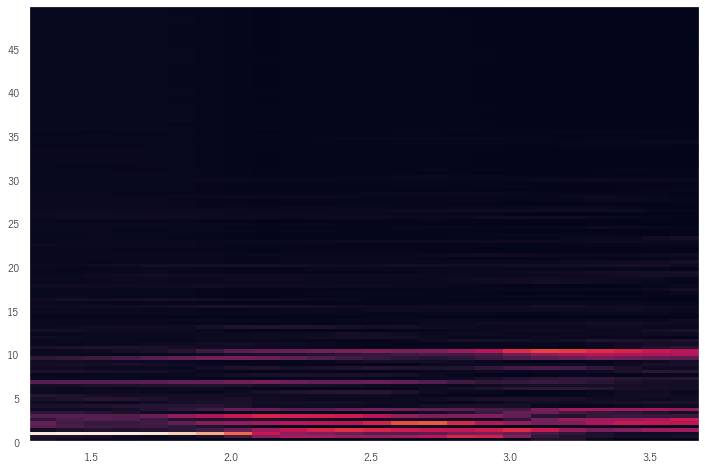

In [9]:
plt.figure(figsize=(12, 8))
index = 1417
f, t, Sxx = signal.spectrogram(Bag[index, :] - Bag[index, :].mean(), fs=100, nfft=255, nperseg=255, noverlap=245)
print(Sxx.shape)
plt.grid(False)
Sxx = (Sxx - Sxx.mean(axis=0, keepdims=True)) / Sxx.std(axis=0, keepdims=True)
plt.pcolormesh(t, f, Sxx)
plt.yticks(np.arange(0, 50, 5))

In [10]:
def spectram(x):
    x = signal.spectrogram(x - x.mean(), fs=100, nfft=255, nperseg=255, noverlap=245)[2]
    x = (x - x.mean(axis=0, keepdims=True)) / x.std(axis=0, keepdims=True)
    return x

In [15]:
%%time
Bag = np.apply_along_axis(spectram, 1, Bag)
Hips = np.apply_along_axis(spectram, 1, Hips)
Torso = np.apply_along_axis(spectram, 1, Torso)
Hand = np.apply_along_axis(spectram, 1, Hand)

Bag.shape

Wall time: 33.3 s


(28685, 128, 25)

In [12]:
%%time

np.save("train_Bag_glo_gyr_norm_spectram", Bag)
np.save("train_Hips_glo_gyr_norm_spectram", Hips)
np.save("train_Torso_glo_gyr_norm_spectram", Torso)
np.save("train_Hand_glo_gyr_norm_spectram", Hand)

Wall time: 18min 24s


In [13]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    sensor = np.load(file_path + "Glo_Gyr_ver2.npy")
    sensor = np.sqrt(np.square(sensor[:, :, 0]) + np.square(sensor[:, :, 1]) + np.square(sensor[:, :, 2])).reshape([-1, 500])
    return sensor

In [14]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

(28685, 500)

In [16]:
np.save("validation_Bag_glo_gyr_norm_spectram", Bag)
np.save("validation_Hips_glo_gyr_norm_spectram", Hips)
np.save("validation_Torso_glo_gyr_norm_spectram", Torso)
np.save("validation_Hand_glo_gyr_norm_spectram", Hand)